Total rows: 210654
Columns: ['SETTLEMENTDATE', 'REGIONID_x', 'RRP', 'ROP', 'INTERVENTION', 'PRICE_STATUS', 'year', 'is_anomaly', 'REGIONID_y', 'TOTALDEMAND', 'AVAILABLEGENERATION', 'INTERCONNECTORFLOWS']

📊 Overall correlation between RRP and TOTALDEMAND (2023–2024): 0.219

📆 Correlation by year:
year
2023    0.216966
2024    0.221931
Name: (TOTALDEMAND, RRP), dtype: float64


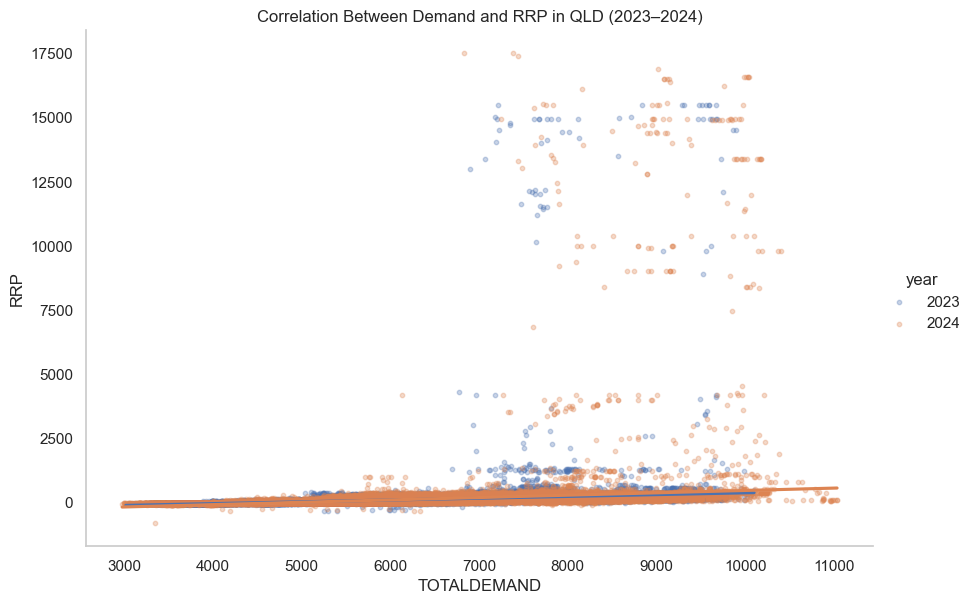


📍 Correlation during anomalies only:
             TOTALDEMAND     RRP
TOTALDEMAND       1.0000  0.3366
RRP               0.3366  1.0000

📍 Correlation during normal periods:
             TOTALDEMAND       RRP
TOTALDEMAND     1.000000  0.676839
RRP             0.676839  1.000000


In [1]:
# 📦 Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ===============================
# 🔹 1. Load Combined Dataset
# ===============================
# Make sure this CSV was saved from your merge step
combined = pd.read_csv("combined_dispatch_price_demand_2023_2024.csv", parse_dates=["SETTLEMENTDATE"])

# Preview
print(f"Total rows: {len(combined)}")
print("Columns:", combined.columns.tolist())
combined.head()

# ===============================
# 🔢 2. Overall Correlation
# ===============================
correlation_overall = combined[["RRP", "TOTALDEMAND"]].corr().loc["TOTALDEMAND", "RRP"]
print(f"\n📊 Overall correlation between RRP and TOTALDEMAND (2023–2024): {correlation_overall:.3f}")

# ===============================
# 📆 3. Correlation by Year
# ===============================
cor_by_year = combined.groupby("year")[["RRP", "TOTALDEMAND"]].corr().unstack().loc[:, ("TOTALDEMAND", "RRP")]
print("\n📆 Correlation by year:")
print(cor_by_year)

# ===============================
# 📈 4. Scatterplot with Regression Line
# ===============================
sns.set(style="whitegrid")
sns.lmplot(
    data=combined,
    x="TOTALDEMAND", y="RRP",
    hue="year",
    height=6, aspect=1.5,
    scatter_kws={'s': 10, 'alpha': 0.3}
)
plt.title("Correlation Between Demand and RRP in QLD (2023–2024)")
plt.grid()
plt.show()

# ===============================
# 🧪 5. Optional: Correlation During Anomalies vs Normal
# ===============================
if "is_anomaly" in combined.columns:
    print("\n📍 Correlation during anomalies only:")
    print(combined[combined["is_anomaly"] == True][["TOTALDEMAND", "RRP"]].corr())

    print("\n📍 Correlation during normal periods:")
    print(combined[combined["is_anomaly"] == False][["TOTALDEMAND", "RRP"]].corr())
else:
    print("\nℹ️ No 'is_anomaly' column found — skipping anomaly-specific analysis.")


Heatmap: Demand vs Generation vs Price

/var/folders/8l/8dts48fs5f38b99q0jpv77ph0000gn/T/ipykernel_23803/359330434.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered["DEMAND_BIN"] = pd.cut(filtered["TOTALDEMAND"], bins=20)
/var/folders/8l/8dts48fs5f38b99q0jpv77ph0000gn/T/ipykernel_23803/359330434.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered["GENERATION_BIN"] = pd.cut(filtered["AVAILABLEGENERATION"], bins=20)
/var/folders/8l/8dts48fs5f38b99q0jpv77ph0000gn/T/ipykernel_23803/359330434.py:9: FutureWarning: The default value 

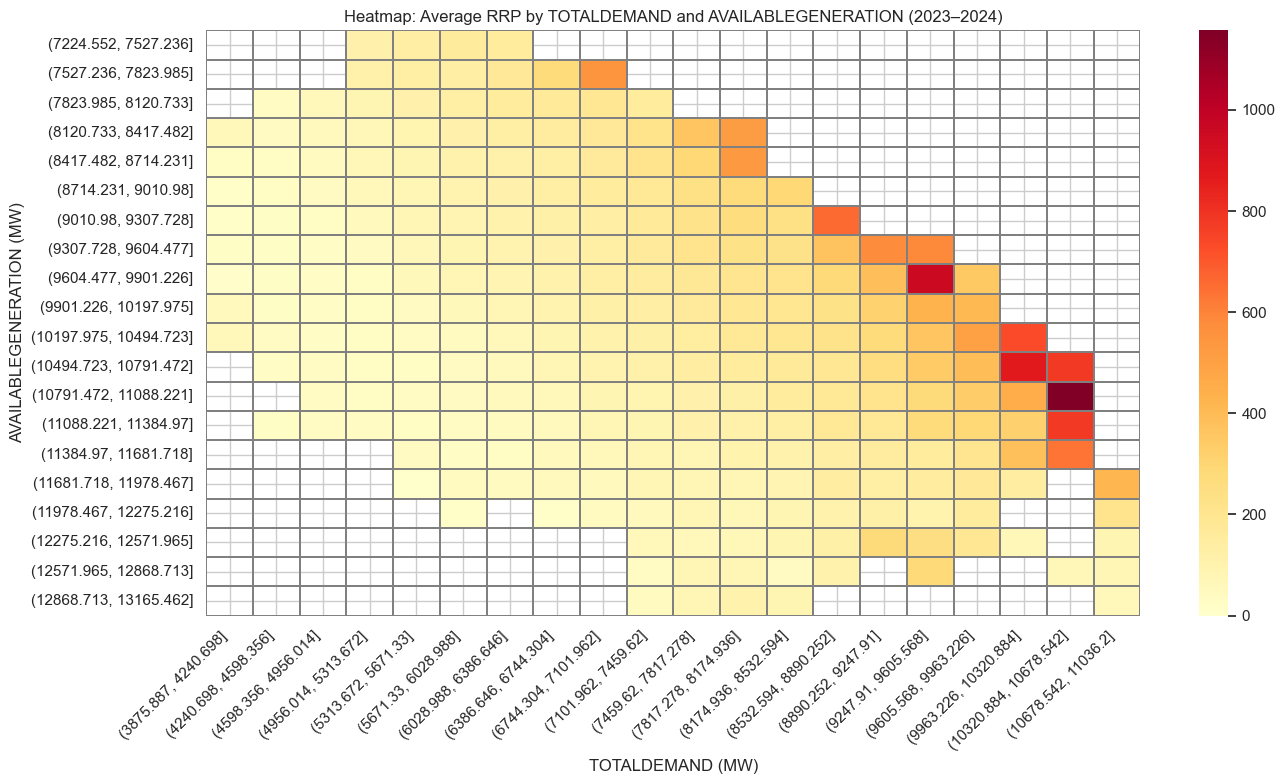

In [ ]:
# Optional: filter out extreme price outliers for visual clarity
filtered = combined[(combined["RRP"] >= 0) & (combined["RRP"] <= 3000)]

# Bin TOTALDEMAND and AVAILABLEGENERATION into groups
filtered["DEMAND_BIN"] = pd.cut(filtered["TOTALDEMAND"], bins=20)
filtered["GENERATION_BIN"] = pd.cut(filtered["AVAILABLEGENERATION"], bins=20)

# Create pivot table: average RRP in each bin pair
heatmap_data = filtered.pivot_table(
    values="RRP",
    index="GENERATION_BIN",
    columns="DEMAND_BIN",
    aggfunc="mean"
)

# Plot
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap="YlOrRd", linewidths=0.1, linecolor="grey")
plt.title("Heatmap: Average RRP by TOTALDEMAND and AVAILABLEGENERATION (2023–2024)")
plt.xlabel("TOTALDEMAND (MW)")
plt.ylabel("AVAILABLEGENERATION (MW)")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Creating a heatmap only for anomaly periods 
“Under what combinations of demand and available generation do price anomalies occur most frequently?”

/var/folders/8l/8dts48fs5f38b99q0jpv77ph0000gn/T/ipykernel_23803/153661156.py:12: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_anomaly = anomaly_data.pivot_table(


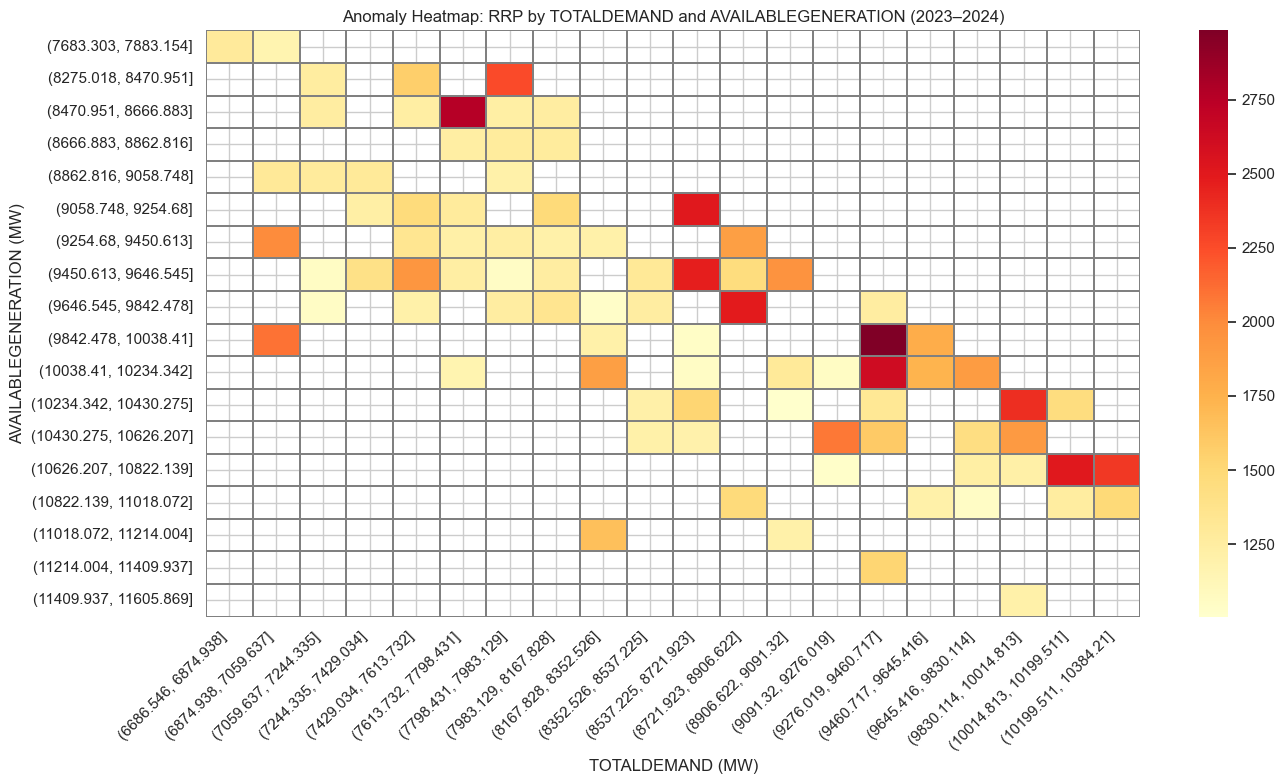

In [4]:

# ✅ Filter for anomaly periods only
anomaly_data = combined[combined["is_anomaly"] == True]

# ✅ Filter for visual clarity (optional)
anomaly_data = anomaly_data[(anomaly_data["RRP"] >= 0) & (anomaly_data["RRP"] <= 3000)]

# ✅ Create bins
anomaly_data["DEMAND_BIN"] = pd.cut(anomaly_data["TOTALDEMAND"], bins=20)
anomaly_data["GENERATION_BIN"] = pd.cut(anomaly_data["AVAILABLEGENERATION"], bins=20)

# ✅ Pivot to create average RRP heatmap
heatmap_anomaly = anomaly_data.pivot_table(
    values="RRP",
    index="GENERATION_BIN",
    columns="DEMAND_BIN",
    aggfunc="mean"
)

# ✅ Plot the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_anomaly, cmap="YlOrRd", linewidths=0.1, linecolor="grey")
plt.title("Anomaly Heatmap: RRP by TOTALDEMAND and AVAILABLEGENERATION (2023–2024)")
plt.xlabel("TOTALDEMAND (MW)")
plt.ylabel("AVAILABLEGENERATION (MW)")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
